In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
import glob
import os

In [2]:
methodOrder = ["WaveletTree", "RLBWT_rindex", "HybridRunLength", "RBBWT"]
mypalette = sns.color_palette(None, 4)
mypalette[0], mypalette[1] = mypalette[1], mypalette[0]

## Space uasge for adding species 564 (Escherichia fergusonii) genomes (without plasmid)

In [69]:
df = pd.read_excel("Species564/SpaceUsage.xlsx")

In [70]:
methodv = []
spacev = []
copyv = []
avgrlv = []
bitpbv = [] # bit per base
cols = list(df.columns)
for i,r in df.iterrows():
    copy = r["Copy"]
    avgrl = r["n/r"]
    length = r["Length"]
    for c in cols:
        if (c == "n/r" or c == "Copy" or c == "Length"):
            continue
        methodv.append(c)
        spacev.append(r[c])
        bitpbv.append(r[c]/length)
        copyv.append(copy)
        avgrlv.append(avgrl)
spaceDf = pd.DataFrame({"Species":copyv, "Space":spacev, "Method":methodv,
                       "n/r":avgrlv, "bits per bp":bitpbv})
spaceDf["Space_MB"] = spaceDf["Space"]/1000000 

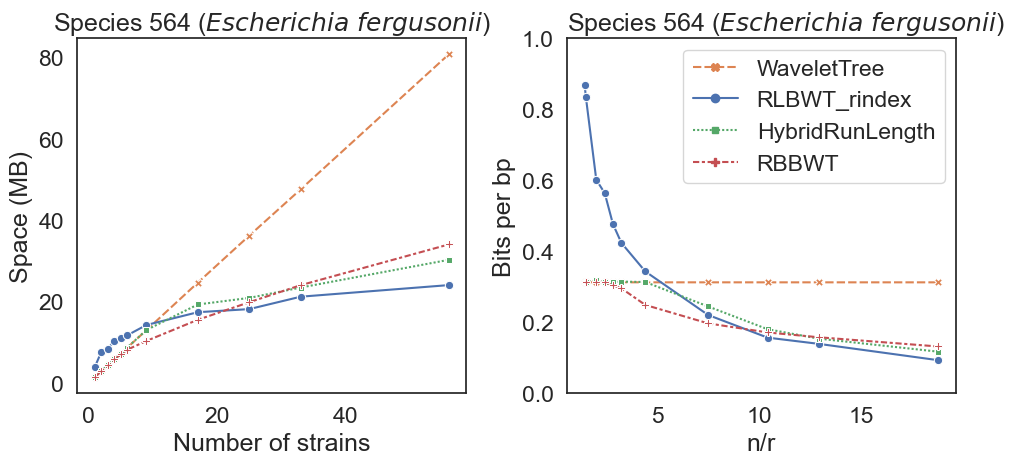

In [71]:
sns.set(font_scale=1.5, style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = sns.lineplot(x="Species", y="Space_MB", hue="Method", style="Method", 
                  hue_order = methodOrder,
                  data=spaceDf[ spaceDf["Method"].isin(methodOrder)], markers=True, palette = mypalette,
                 ax = axes[0])
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set(ylabel="log(space)", xlabel="log(Copy)")
ax.set(title=r"Species 564 ($\it{Escherichia\ fergusonii}$)")
ax.set(xlabel = "Number of strains", ylabel="Space (MB)")
ax.get_legend().remove()

ax = sns.lineplot(x="n/r", y="bits per bp", hue="Method", style="Method", 
                  hue_order = methodOrder,
                  data=spaceDf[spaceDf["Method"].isin(methodOrder)], markers=True, palette = mypalette,
                 ax = axes[1])
ax.set(ylim=(0,1))
ax.set_title(r"Species 564 ($\it{Escherichia\ fergusonii}$)", loc="left")
ax.set(ylabel="Bits per bp")
ax.legend()

plt.tight_layout()
plt.savefig("RBBWT_Species564.pdf", format="pdf", bbox_inches="tight")

## Space uasge for adding genus 445 (Legionella) genomes (without plasmid)

In [72]:
df = pd.read_excel("Genus445/SpaceUsage.xlsx")

In [73]:
methodv = []
spacev = []
copyv = []
avgrlv = []
bitpbv = [] # bit per base
cols = list(df.columns)
for i,r in df.iterrows():
    copy = r["Copy"]
    avgrl = r["n/r"]
    length = r["Length"]
    for c in cols:
        if (c == "n/r" or c == "Copy" or c == "Length"):
            continue
        methodv.append(c)
        spacev.append(r[c])
        bitpbv.append(r[c]/length)
        copyv.append(copy)
        avgrlv.append(avgrl)
spaceDf = pd.DataFrame({"Species":copyv, "Space":spacev, "Method":methodv,
                       "n/r":avgrlv, "bits per bp":bitpbv})
spaceDf["Space_MB"] = spaceDf["Space"]/1000000 

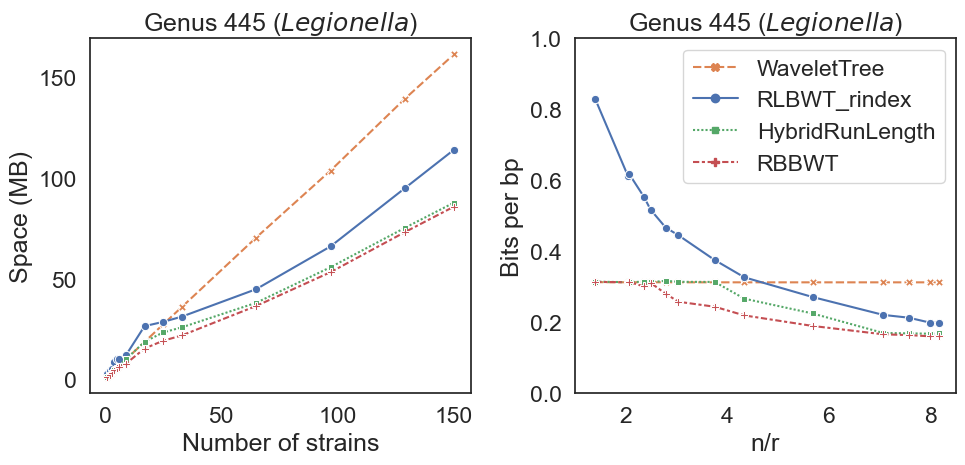

In [74]:
sns.set(font_scale=1.5, style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = sns.lineplot(x="Species", y="Space_MB", hue="Method", style="Method", 
                  hue_order = methodOrder,
                  data=spaceDf[ spaceDf["Method"].isin(methodOrder)], markers=True, palette = mypalette,
                 ax = axes[0])
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set(ylabel="log(space)", xlabel="log(Copy)")
ax.set(title="Genus 445 ($\it{Legionella}$)")
ax.set(xlabel = "Number of strains", ylabel="Space (MB)")
ax.get_legend().remove()
#ax.legend()

ax = sns.lineplot(x="n/r", y="bits per bp", hue="Method", style="Method", 
                  hue_order = methodOrder,
                  data=spaceDf[spaceDf["Method"].isin(methodOrder)], markers=True, palette = mypalette,
                 ax = axes[1])
ax.set(ylim=(0,1),xlim=(1,8.5))
ax.set(title="Genus 445 ($\it{Legionella}$)", ylabel="Bits per bp")
ax.legend()

plt.tight_layout()
plt.savefig("RBBWT_Genus445.pdf", format="pdf")

Running time of Genus 445 with 150 strains added.
   Testing rank('A') for the first 10000000 positions
Node: m01 Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz

wavelet tree: 10ns

Hybrid run length: 211ns

Runblock: 40ns

RLBWT_rindex: 144ns

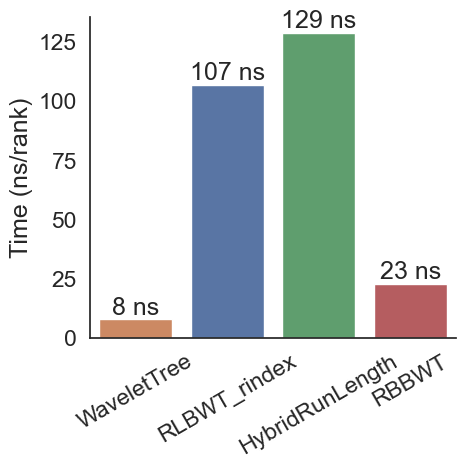

In [132]:
# Plot the running time
methodv = methodOrder
timev = [8, 107, 129, 23]

sns.set(font_scale=1.5, style="white")
fig = plt.figure(figsize=(5, 5))
timeDf = pd.DataFrame({"Method":methodv, "Time":timev})
snsFig = sns.barplot(x="Method", y="Time", data=timeDf, palette = mypalette)
snsFig.set(xlabel="")
for tick in snsFig.get_xticklabels():
    tick.set_rotation(30)
snsFig.set(ylabel="Time (ns/rank)")

for i in range(4):
    snsFig.text(i, timev[i]+2, "%d ns"%(timev[i]), horizontalalignment="center")
snsFig.spines['right'].set_visible(False)  
snsFig.spines['top'].set_visible(False)  

plt.tight_layout()
plt.savefig("RBBWT_Genus445_runtime.pdf", format="pdf")

Running time of Genus 445 with 150 strains added.
   Testing rank('A') for the first 10000000 positions
Node: s08. AMD EPYC 7543 32-Core Processor
    
wavelet tree: 8ns

Hybrid run length: 129ns

Runblock: 23ns

RLBWT_rindex: 107ns

## Simulated data

### Accuracy

In [99]:
methods = ["Centrifuger", "Centrifuge", "Kraken2"]
ranks = ["strain", "species", "genus", "family", "order", "class", "phylum"]
df = pd.DataFrame()
for m in methods:
    mdf = pd.read_csv("sim/%s_eval.out"%m, sep="\t")
    mdf["method"] = m
    df = pd.concat([df, mdf], ignore_index=True)

In [404]:
ranks

['strain', 'species', 'genus', 'family', 'order', 'class', 'phylum']

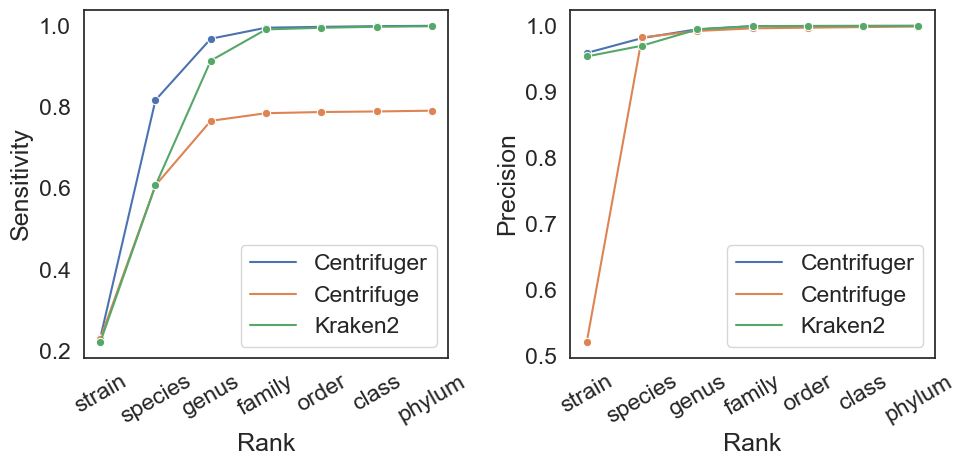

In [413]:
sns.set(font_scale=1.5, style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, measure in enumerate(["sensitivity", "precision"]):  
    ax = sns.lineplot(x="rank", y=measure, hue="method", marker='o', data=df,
                     ax = axes[i])
    #snsFig.legend([])
    #snsFig.set(xlim=(0.95,1))
    ax.set(xlabel="Rank", ylabel=measure.capitalize())
    ax.legend()
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
plt.tight_layout()
plt.savefig("sim_cck_accuracy.pdf", format="pdf")

### Speed and memory of simulated data (database P)

Speed (running on s node) with 1 thread
Cfr: 6min11s load: 5s
Centrifuge: 2min07s  load: 10s
Kraken2: 20s 

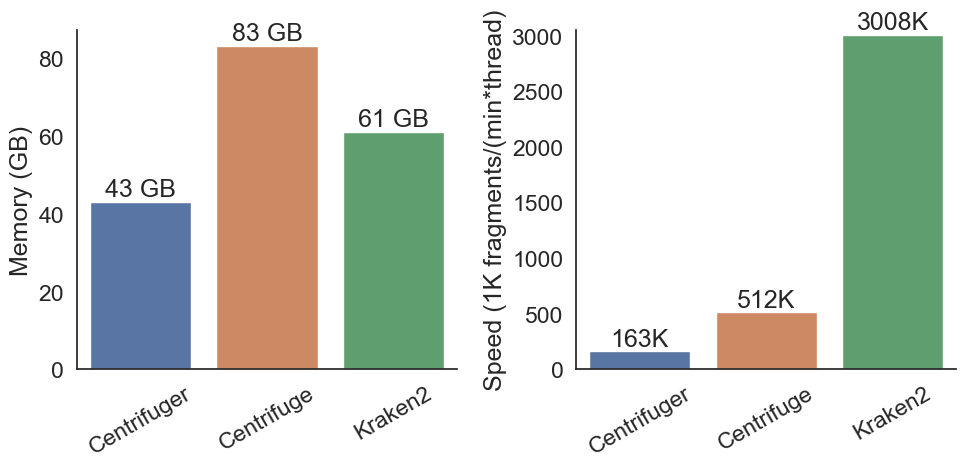

In [504]:
methodv = ["Centrifuger", "Centrifuge", "Kraken2"]
speedv = [1000/366*60, 1000/117*60, 3008]
memoryv = [43, 83, 61]

timeDf = pd.DataFrame({"Method":methodv, "Speed":speedv, "Memory":memoryv})
sns.set(font_scale=1.5, style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, measure in enumerate(["Memory", "Speed"]):  
    ax = sns.barplot(x="Method", y=measure, data=timeDf,
                     ax = axes[i])
    #snsFig.legend([])
    #snsFig.set(xlim=(0.95,1))
    #ax.legend()
    ax.set(xlabel = "")
    if (measure == "Memory"):
        ax.set(ylabel = "Memory (GB)")
        for i in range(3):
            ax.text(i, memoryv[i]+1.5, "%d GB"%(memoryv[i]), horizontalalignment="center")
    elif (measure == "Speed"):
        ax.set(ylabel = "Speed (1K fragments/(min*thread)", ylim=(0, 3050))
        for i in range(3):
            ax.text(i, speedv[i]+50, "%dK"%(speedv[i]), horizontalalignment="center")
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)  
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
plt.tight_layout()
plt.savefig("sim_cck_time.pdf", format="pdf")

## CAMI simulated

In [112]:
camiDf = pd.read_csv("sim_cami/cami_10sample_eval.out", sep="\t")
camiDf = camiDf[ camiDf["rank"] != "strain"]

In [490]:
def hollowboxplot(data, x=None, y=None, hue=None, palette=None, ax=None, color=None, 
                  order=None, hue_order=None, jitter=True):
    snsFig = sns.boxplot(x=x, y=y, hue=hue, data=data, hue_order=hue_order, order=order,
                         showfliers = False, palette=palette, ax=ax)
    for i,box in enumerate([p for p in snsFig.patches if not p.get_label()]): 
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor("white")
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
             snsFig.lines[j].set_color(color)

    snsFig = sns.stripplot(x=x, y=y, hue=hue, data=data, hue_order=hue_order, order=order,
                         jitter=jitter, dodge=True, palette=palette, ax=snsFig)
    return snsFig

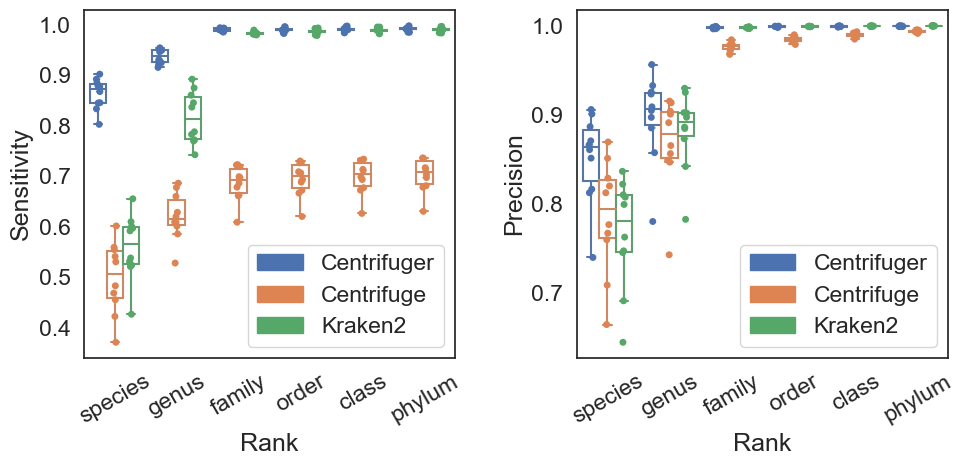

In [502]:
sns.set(font_scale=1.5, style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, measure in enumerate(["sensitivity", "precision"]):  
    ax = hollowboxplot(x="rank", y=measure, hue="method", data=camiDf,
                     ax = axes[i])
    ax = sns.stripplot(x="rank", y=measure, hue="method", data=camiDf,
                     dodge=True, s=1, ax=ax)
    ax.set(xlabel="Rank", ylabel=measure.capitalize())
    patches = []
    for i, l in [[0, "Centrifuger"], [1, "Centrifuge"], [2, "Kraken2"]]:
        patches.append( mpatches.Patch( color=sns.color_palette()[i], label=l ) )
    ax.legend( handles=patches, loc="best")
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
plt.tight_layout()
plt.savefig("sim_cami_accuracy.pdf", format="pdf")

In [114]:
camiDf

,method,sample,rank,true,predicted,cases,sensitivity,precision,uniq_true,uniq_pred,uniq_sensitivity,uniq_precision
1,Centrifuger,0,species,5186299,6023200,6136535,0.8452,0.8611,5186299,6023200,0.8452,0.8611
2,Centrifuger,0,genus,5622794,6213157,6140871,0.9156,0.9050,5622794,6213157,0.9156,0.9050
3,Centrifuger,0,family,6569356,6583102,6652293,0.9875,0.9979,6569356,6583102,0.9875,0.9979
4,Centrifuger,0,order,6591558,6597296,6655023,0.9905,0.9991,6591558,6597296,0.9905,0.9991
5,Centrifuger,0,class,6601864,6605821,6655023,0.9920,0.9994,6601864,6605821,0.9920,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Kraken2,9,genus,4927606,5462165,6250544,0.7883,0.9021,4927606,5462165,0.7883,0.9021
206,Kraken2,9,family,6539072,6550285,6654229,0.9827,0.9983,6539072,6550285,0.9827,0.9983
207,Kraken2,9,order,6574837,6579211,6655154,0.9879,0.9993,6574837,6579211,0.9879,0.9993
208,Kraken2,9,class,6592222,6594393,6655154,0.9905,0.9997,6592222,6594393,0.9905,0.9997


## SRA bacteria (100 inspecies, 100 in not-inspecies but in genus)

### In species

In [83]:
case = "inspecies"
folder = "bacteria_sra/%s"%(case)
measure = "sensitivity"
methods = {"Centrifuger":"cfr", "Centrifuge":"centrifuge", "Kraken2":"kraken"}
df = pd.DataFrame()
for m in methods:
    mdf = pd.read_csv("bacteria_sra/%s/%s_eval.out"%(case, methods[m]), sep="\t",
                     header=None)
    mdf["method"] = m
    df = pd.concat([df, mdf], ignore_index=True)
df.columns = ["SRA", "rank", "sensitivity", "non-specific precision", "precision", "method"]

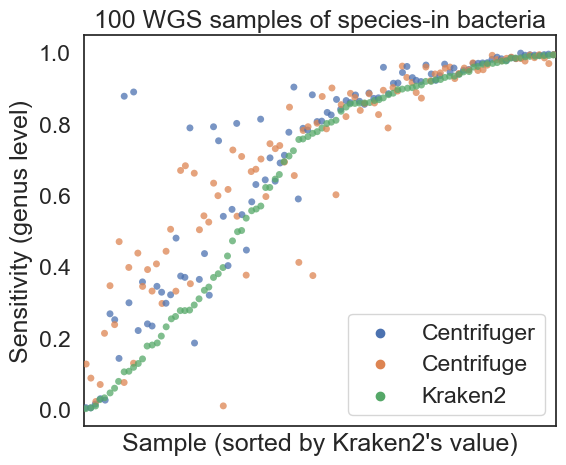

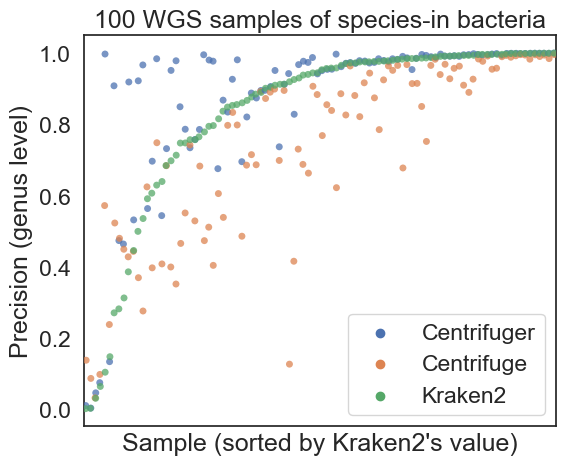

In [357]:
for measure in ["sensitivity", "precision"]:
    sns.set(font_scale=1.5, style="white")
    fig = plt.figure(figsize=(6, 5))
    subdf = df[ df["method"] == "Kraken2" ]
    sraList = list(subdf.sort_values(by=measure)["SRA"])
    ax = sns.stripplot(x="SRA", y = measure, hue="method", size=5, alpha=0.75,
                order = sraList, hue_order = methods, data=df)
    ax.get_xaxis().set_ticks([])
    ax.set(xlabel = "Sample (sorted by Kraken2's value)", 
           title="100 WGS samples of species-in bacteria",
          ylabel = "%s (genus level)"%(measure.capitalize()))
    ax.legend()
    plt.tight_layout()
    plt.savefig("SRA_%s_%s.png"%(case, measure), dpi=300)
    plt.show()

In [85]:
# The comparison between Centrifuger with other two methods
dfx = df[ df["method"] == "Centrifuger"]
for other in ["Kraken2", "Centrifuge"]:
    dfy = df[ df["method"] == other]
    dftest = dfx.merge(dfy, left_on="SRA", right_on="SRA")
    for measure in ["sensitivity", "precision"]:
        x = np.array(dftest["%s_x"%measure])
        y = np.array(dftest["%s_y"%measure])
        #print(other, measure, np.mean(x), np.mean(y), sp.stats.wilcoxon(x, y))
        print(np.mean(x), np.mean(y), np.mean(x)/np.mean(y))

0.7085716856307055 0.6407020385601967 1.105930125059423
0.875962566638022 0.827644534167516 1.0583801746713721
0.7085716856307055 0.6992492640603429 1.0133320434493271
0.875962566638022 0.7387870855765819 1.185676609322945


### In genus

In [89]:
case = "ingenus"
folder = "bacteria_sra/%s"%(case)
measure = "sensitivity"
methods = {"Centrifuger":"cfr", "Centrifuge":"centrifuge", "Kraken2":"kraken"}
df = pd.DataFrame()
for m in methods:
    mdf = pd.read_csv("bacteria_sra/%s/%s_eval.out"%(case, methods[m]), sep="\t",
                     header=None)
    mdf["method"] = m
    df = pd.concat([df, mdf], ignore_index=True)
df.columns = ["SRA", "rank", "sensitivity", "non-specific precision", "precision", "method"]

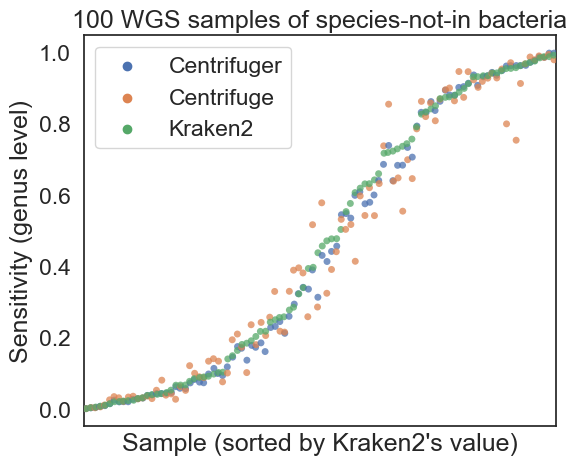

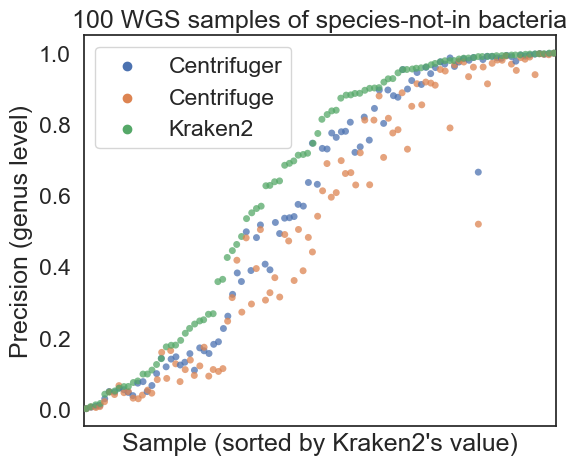

In [90]:
for measure in ["sensitivity", "precision"]:
    sns.set(font_scale=1.5, style="white")
    fig = plt.figure(figsize=(6, 5))
    subdf = df[ df["method"] == "Kraken2" ]
    sraList = list(subdf.sort_values(by=measure)["SRA"])
    ax = sns.stripplot(x="SRA", y = measure, hue="method", size=5, alpha=0.75,
                order = sraList, hue_order = methods, data=df)
    ax.get_xaxis().set_ticks([])
    ax.set(xlabel = "Sample (sorted by Kraken2's value)", title="100 WGS samples of species-not-in bacteria",
          ylabel = "%s (genus level)"%(measure.capitalize()))
    ax.legend()
    plt.tight_layout()
    #plt.savefig("SRA_%s_%s.png"%(case, measure), dpi=300)
    plt.show()

In [91]:
# The comparison between Centrifuger with other two methods
dfx = df[ df["method"] == "Centrifuger"]
for other in ["Kraken2", "Centrifuge"]:
    dfy = df[ df["method"] == other]
    dftest = dfx.merge(dfy, left_on="SRA", right_on="SRA")
    for measure in ["sensitivity", "precision"]:
        x = np.array(dftest["%s_x"%measure])
        y = np.array(dftest["%s_y"%measure])
        #print(other, measure, np.mean(x), np.mean(y), sp.stats.wilcoxon(x, y))
        print(np.mean(x), np.mean(y), np.mean(x)/np.mean(y))

0.45354895583333243 0.4643637468518069 0.9767105182267257
0.5804756216546523 0.6399304360739198 0.9070917539349547
0.45354895583333243 0.4532973128644646 1.000555138893892
0.5804756216546523 0.5280745169677319 1.0992305119887509


In [98]:
# The comparison between Kraken2 with other two methods
dfx = df[ df["method"] == "Kraken2"]
for other in ["Centrifuger", "Centrifuge"]:
    dfy = df[ df["method"] == other]
    dftest = dfx.merge(dfy, left_on="SRA", right_on="SRA")
    for measure in ["sensitivity", "precision"]:
        x = np.array(dftest["%s_x"%measure])
        y = np.array(dftest["%s_y"%measure])
        #print(other, measure, np.mean(x), np.mean(y), sp.stats.wilcoxon(x, y))
        print(np.mean(x), np.mean(y), np.mean(x)/np.mean(y))

0.4643637468518069 0.45354895583333243 1.023844815161362
0.6399304360739198 0.5804756216546523 1.1024243089654495
0.4643637468518069 0.4532973128644646 1.0244131912395678
0.6399304360739198 0.5280745169677319 1.211818437572936


## SRA COVID-19 nanopore WGS data

In [3]:
import heatmapannot

In [4]:
# Compare the distribution 
df = pd.DataFrame()
for sraProj in ["PRJEB40277", "PRJNA673096"]:
    tmpDf = pd.read_csv("sarscov2_sra/%s_cfr_strain_hits.tsv"%sraProj, sep="\t",
                       header=None)
    tmpDf.columns = ["SRA", "Strain", "Count"]
    tmpDf["Project"] = sraProj
    df = pd.concat([df, tmpDf]) 

In [5]:
sraList = list(df["SRA"].unique())
strainList = list(df["Strain"].unique())

In [6]:
# Obtain abundance fraction for each strain
grouped = df.groupby("SRA")
df["Fraction"] = grouped["Count"].transform(lambda x: x/x.sum())

df

,SRA,Strain,Count,Project,Fraction
0,ERR7616152,MN975262.1,38,PRJEB40277,0.001643
1,ERR7616152,MN988668.1,2,PRJEB40277,0.000086
2,ERR7616152,MN988669.1,1,PRJEB40277,0.000043
3,ERR7616152,MN988713.1,85,PRJEB40277,0.003675
4,ERR7616152,MN994467.1,9,PRJEB40277,0.000389
...,...,...,...,...,...
7492,SRR20666606,MT192765.1,22358,PRJNA673096,0.057077
7493,SRR20666606,MT192772.1,17,PRJNA673096,0.000043
7494,SRR20666606,MT192773.1,8,PRJNA673096,0.000020
7495,SRR20666606,NC_045512.2,80,PRJNA673096,0.000204


In [82]:
1-np.mean(df[ df["Strain"] == "no_rank"]["Fraction"])

0.24050703763781822

In [36]:
dfStrain = df[ df["Strain"] != "no_rank"][ ["SRA", "Strain", "Count", "Project"] ]
grouped = dfStrain.groupby("SRA")
dfStrain["Fraction"] = grouped["Count"].transform(lambda x: x/x.sum())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


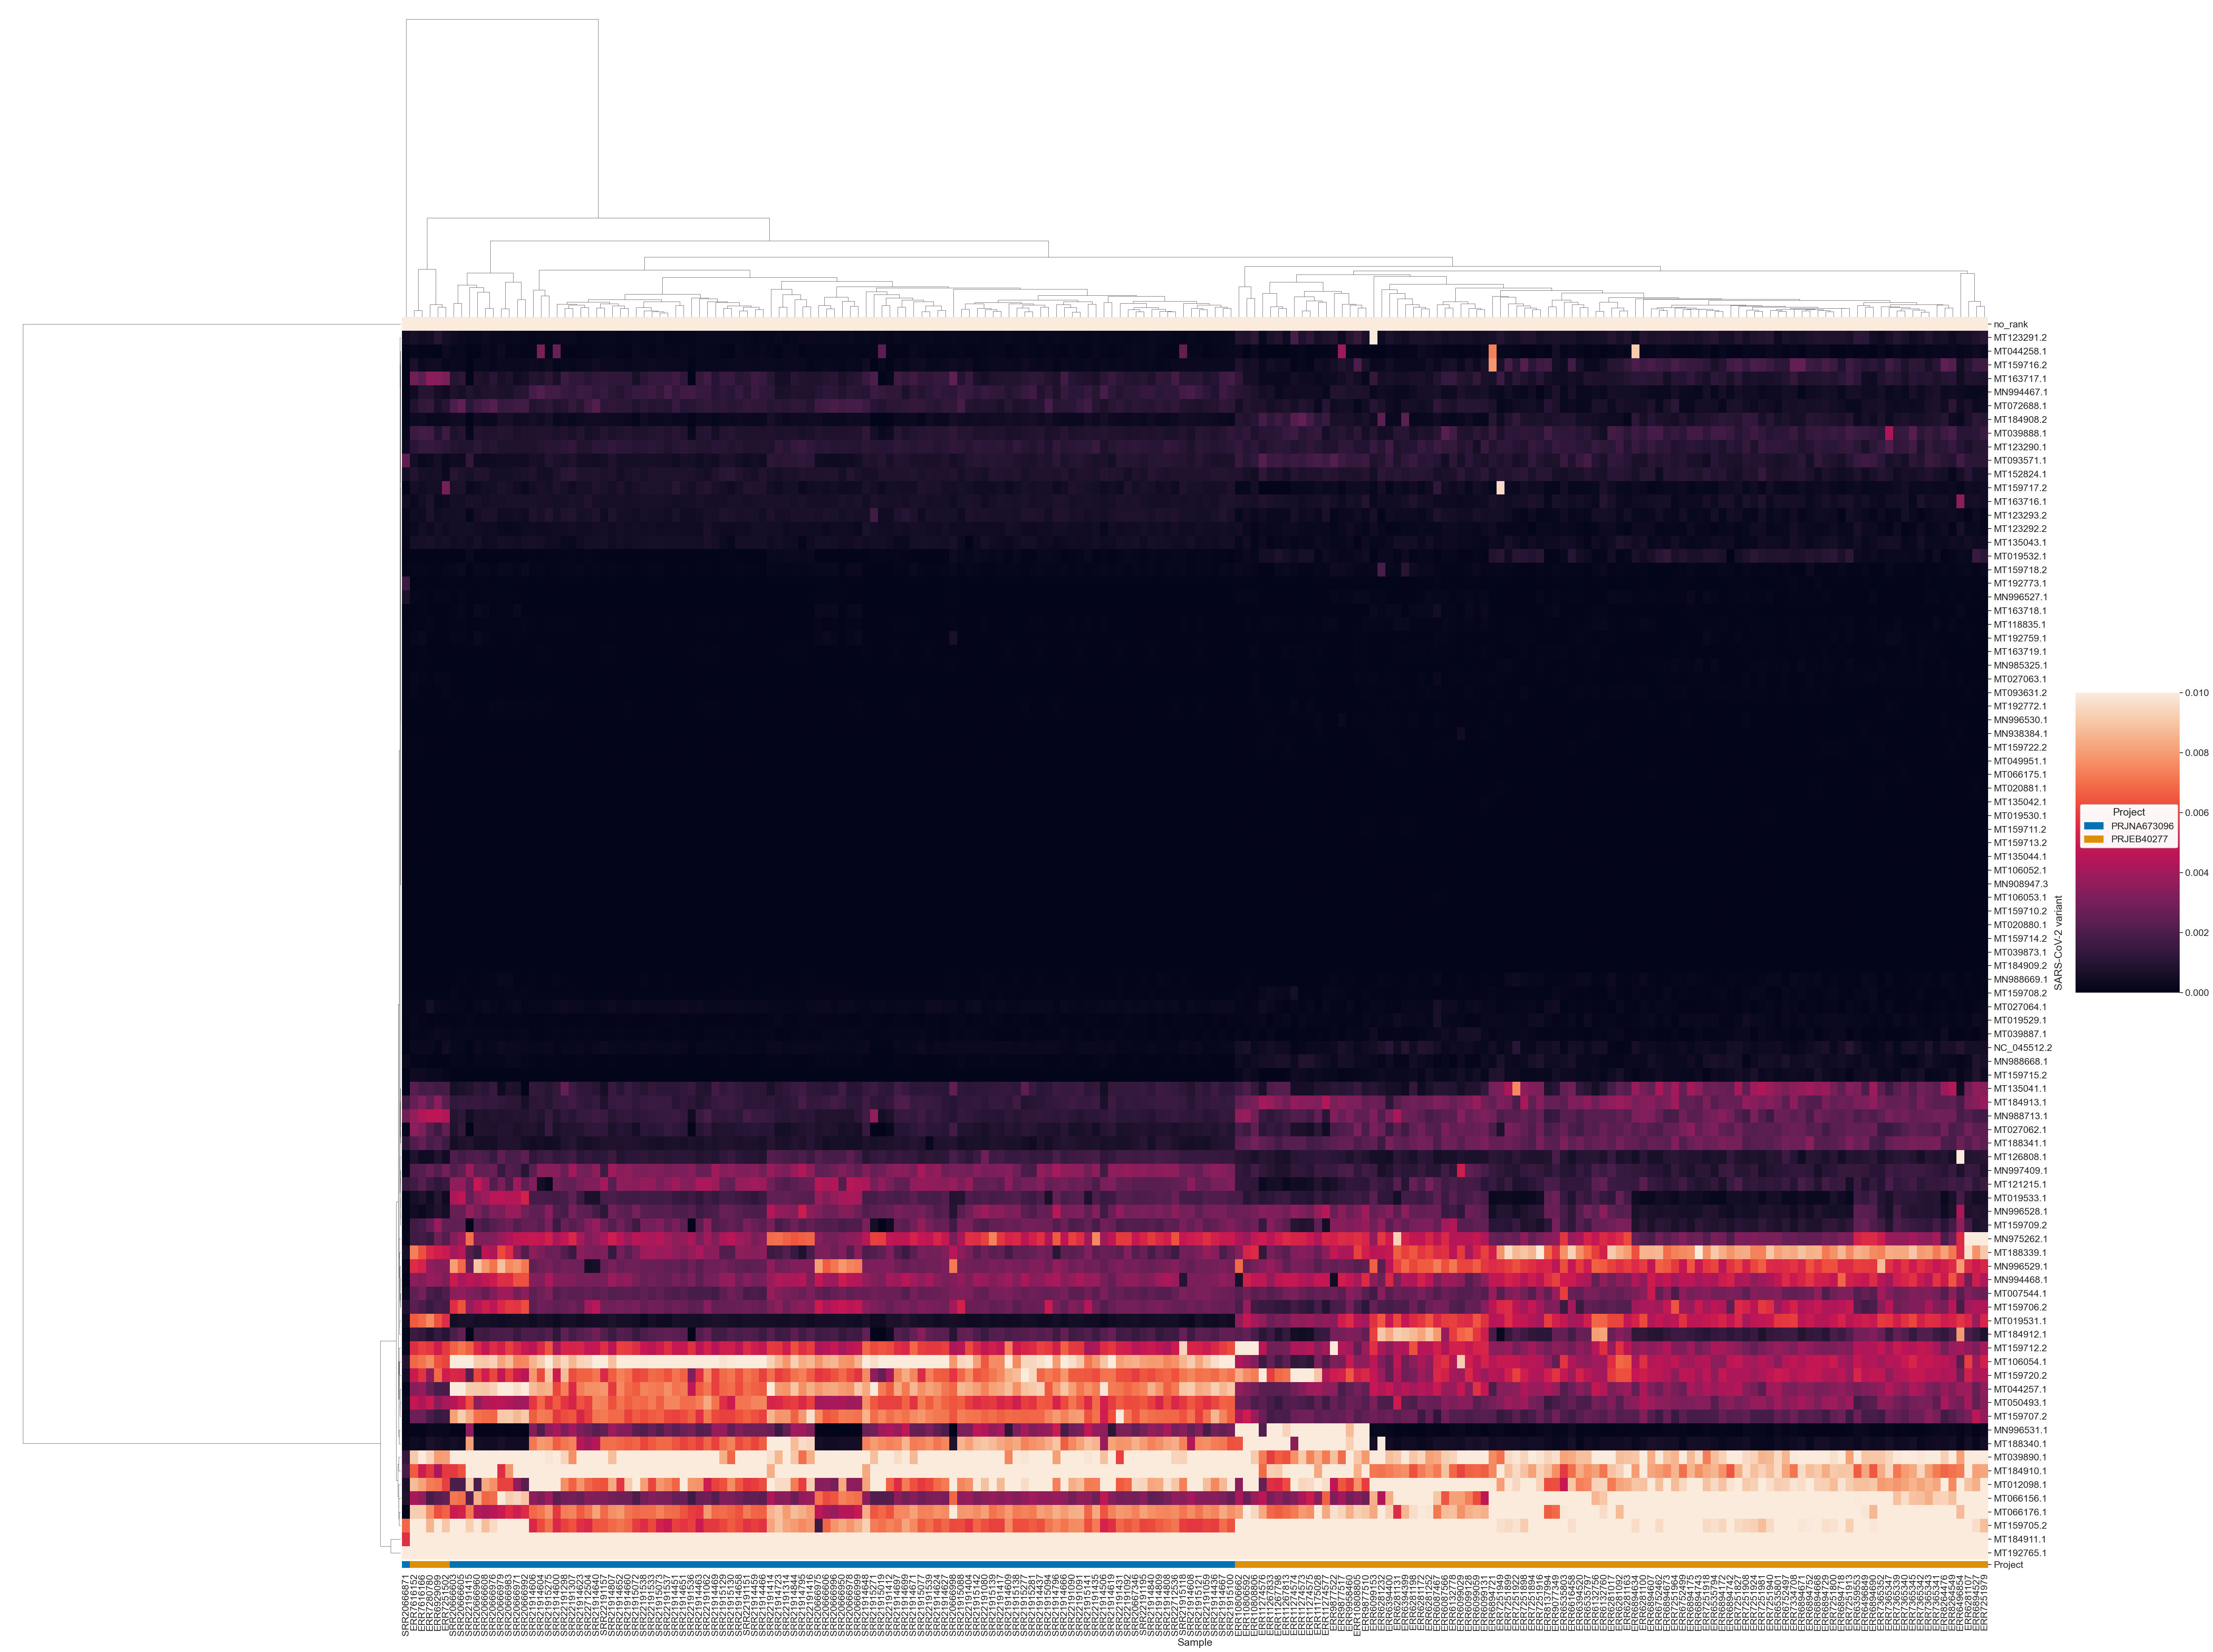

In [25]:
sns.set(font_scale=1.5, style="white")
pivotDf = pd.DataFrame.pivot(df, columns = "SRA", index="Strain", values="Fraction")
pivotDf = pivotDf.fillna(0)
g = sns.clustermap(pivotDf, col_cluster=True, row_cluster=True, cmap="rocket",
              vmin=0, vmax=0.01, figsize=(50, 40),xticklabels=1, yticklabels=1,
              cbar_pos=(1, 0.4, 0.05, 0.18))

colormaps, origXlim, origYlim, newXlim, newYlim = heatmapannot.AddHeatmapAnnot(
    data=df, heatmap_row="Strain", heatmap_col="SRA",
                       col_features=["Project"],
                        ax=g.ax_heatmap)
#heatmapannot.AdjustAxes(g.ax_col_dendrogram, "col", origXlim, newXlim)
heatmapannot.AdjustAxes(g.ax_row_dendrogram, "row", origYlim, newYlim)
g.ax_heatmap.set(xlabel="Sample", ylabel = "SARS-CoV-2 variant")

plt.savefig("sarscov2_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [12]:
df

,SRA,Strain,Count,Project,Fraction
0,ERR7616152,MN975262.1,38,PRJEB40277,0.001643
1,ERR7616152,MN988668.1,2,PRJEB40277,0.000086
2,ERR7616152,MN988669.1,1,PRJEB40277,0.000043
3,ERR7616152,MN988713.1,85,PRJEB40277,0.003675
4,ERR7616152,MN994467.1,9,PRJEB40277,0.000389
...,...,...,...,...,...
7492,SRR20666606,MT192765.1,22358,PRJNA673096,0.057077
7493,SRR20666606,MT192772.1,17,PRJNA673096,0.000043
7494,SRR20666606,MT192773.1,8,PRJNA673096,0.000020
7495,SRR20666606,NC_045512.2,80,PRJNA673096,0.000204


/Users/lsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/lsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/var/folders/c8/zsnj8w1x221_yh1cvqwq68n80000gn/T/ipykernel_60881/3259998965.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


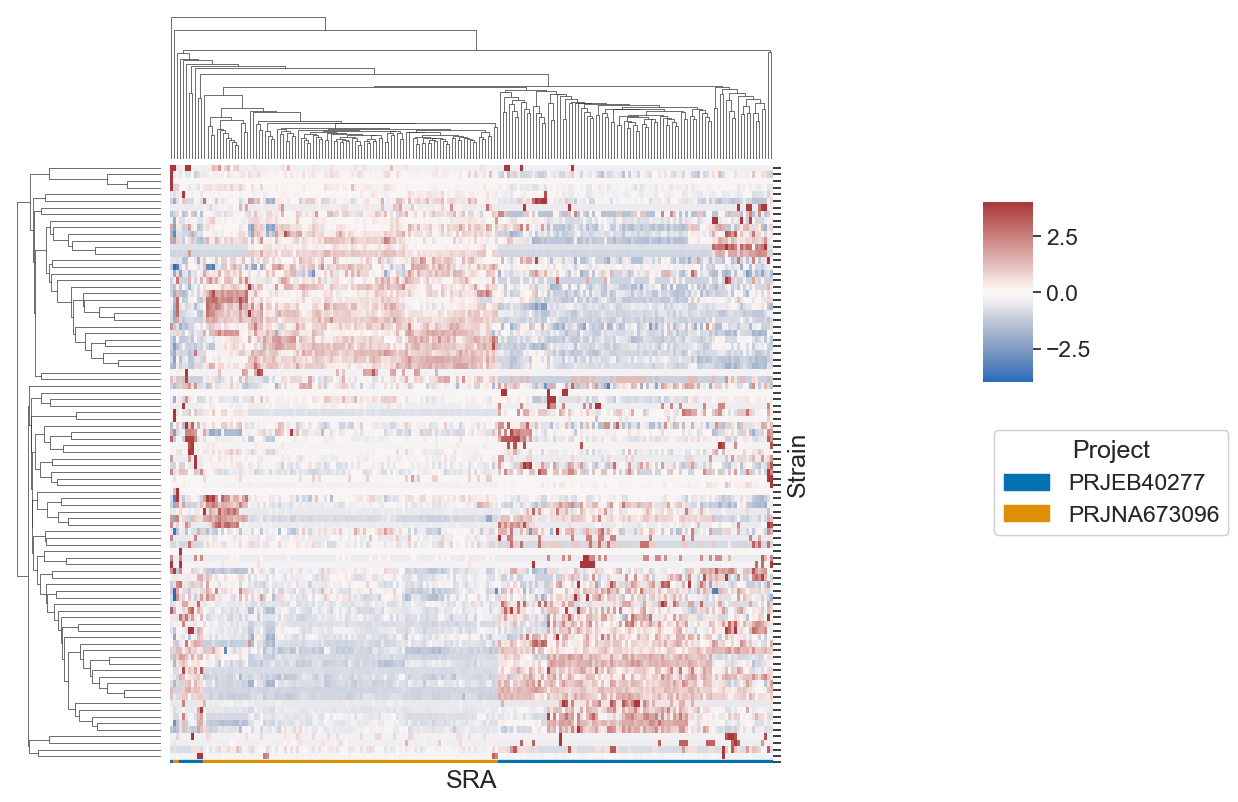

In [162]:
# Heamtap without no_Rank
sns.set(font_scale=1.5, style="white")

pivotDf = pd.DataFrame.pivot(df, columns = "SRA", index="Strain", values="Fraction")
pivotDf = pivotDf.drop(labels="no_rank", axis=0)
pivotDf = pivotDf.fillna(0)
g = sns.clustermap(pivotDf, z_score=False, col_cluster=True, row_cluster=True, cmap="vlag",
              vmin=-4, vmax=4, center=0, xticklabels=1, yticklabels=1,
              cbar_pos=(1, 0.6, 0.05, 0.18))

colormaps, origXlim, origYlim, newXlim, newYlim = heatmapannot.AddHeatmapAnnot(data=df, heatmap_row="Strain", heatmap_col="SRA",
                       col_features=["Project"],
                        ax=g.ax_heatmap)

#heatmapannot.AdjustAxes(g.ax_col_dendrogram, "col", origXlim, newXlim)
heatmapannot.AdjustAxes(g.ax_row_dendrogram, "row", origYlim, newYlim)

for i, l in enumerate(g.ax_heatmap.get_xticklabels()):
    l.set_visible(False)

for i, l in enumerate(g.ax_heatmap.get_yticklabels()):
    #if (l.get_text() != "Project"):
    l.set_visible(False)

plt.tight_layout()

In [61]:
# Use PCA to confirm the difference
# Filter out the no_rank category
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pcaRawX = pd.DataFrame.pivot(df, columns = "Strain", index="SRA", values="Fraction")
sraList = list(pcaRawX.index)

pcaRawX = pcaRawX.fillna(0)
pcaRawX = pcaRawX.drop(labels="no_rank", axis=1)
pcaRawX = StandardScaler().fit_transform(pcaRawX)
pca = PCA(n_components=2)
pcaResult = pca.fit(pcaRawX)
pcaX = pca.fit_transform(pcaRawX)

sraToProj = pd.Series(df["Project"].values, index=df["SRA"]).to_dict()

In [62]:
pcaDf = pd.DataFrame({"SRA":sraList})
pcaDf["PCA1"] = pcaX[:, 0]
pcaDf["PCA2"] = pcaX[:, 1]
pcaDf["Project"] = pcaDf["SRA"].map(sraToProj)

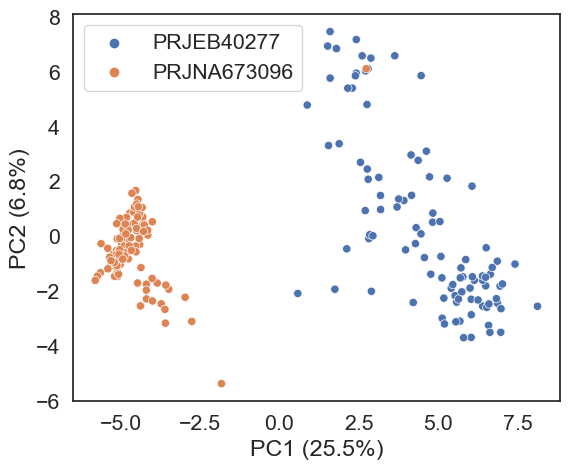

In [64]:
sns.set(font_scale=1.4, style="white")
fig = plt.figure(figsize=(6, 5))
snsFig = sns.scatterplot(x="PCA1", y="PCA2", data=pcaDf, hue="Project") 
#snsFig.legend(bbox_to_anchor=(-0.02, 1), loc="lower left", ncol=2)
snsFig.set(xlabel = "PC1 (25.5%)", ylabel = "PC2 (6.8%)")
snsFig.legend()

plt.tight_layout()
plt.savefig("sarscov2_pca.png", dpi=300)

In [345]:
# Provide some insights on the PCA disctintion
tag = np.argmax(np.abs(pcaResult.components_[0]) - np.abs(pcaResult.components_[1]))
tmpDf = pd.DataFrame.pivot(df, columns = "Strain", index="SRA", values="Fraction")
tmpDf.columns[tag]

'MT019531.1'

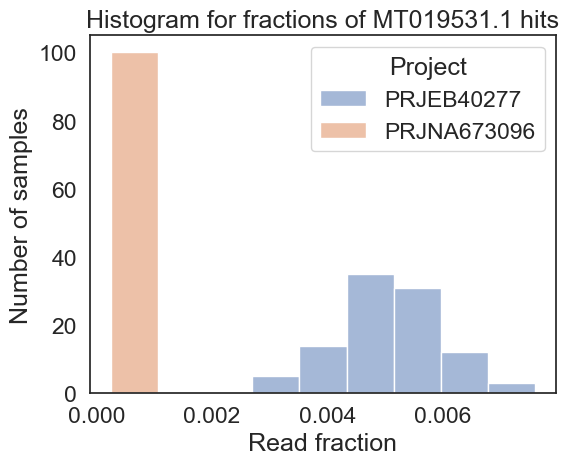

In [66]:
sns.set(font_scale=1.5, style="white")
fig = plt.figure(figsize=(6, 5))

tmpDf = df[ df["Strain"] == "MT019531.1"]

snsFig = sns.histplot(data=tmpDf, x="Fraction", hue="Project")
snsFig.set(title="Histogram for fractions of MT019531.1 hits",
          xlabel="Read fraction", ylabel="Number of samples")

plt.tight_layout()
plt.savefig("sarscov2_MT019531.pdf", format="pdf")

In [350]:
np.min(np.abs(pcaResult.components_[0]) - np.abs(pcaResult.components_[1]))

-0.24916845902583426

In [348]:
tag = np.argmin(np.abs(pcaResult.components_[0]) - np.abs(pcaResult.components_[1]))
tmpDf = pd.DataFrame.pivot(df, columns = "Strain", index="SRA", values="Fraction")
tmpDf.columns[tag]

'MT159706.2'

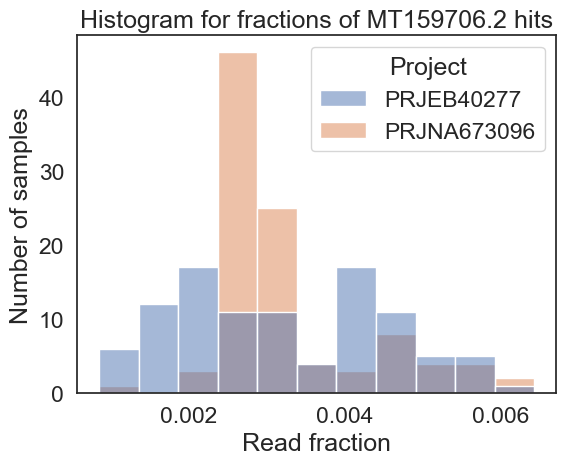

In [67]:
sns.set(font_scale=1.5, style="white")
fig = plt.figure(figsize=(6, 5))

tmpDf = df[ df["Strain"] == "MT159706.2"]

snsFig = sns.histplot(data=tmpDf, x="Fraction", hue="Project")
snsFig.set(title="Histogram for fractions of MT159706.2 hits",
          xlabel="Read fraction", ylabel="Number of samples")

plt.tight_layout()
plt.savefig("sarscov2_MT159706_PC2.pdf", format="pdf")